In [1]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup as bs
from PIL import Image

# 국립암센터 데이터 JSON 파일로 신청하고 데이터 프레임으로 전환하기 

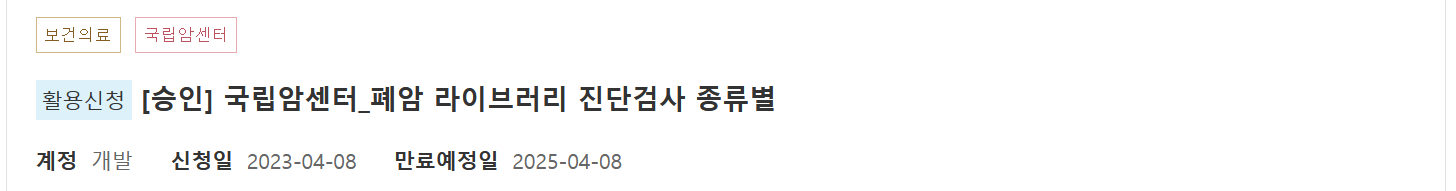

In [149]:
Image.open("C:/Users/whileduck/Desktop/사용 데이터.png")

* 예시로 보게 될 데이터는 국립암센터 전립선암 라이브러리 진단검사 종류별 

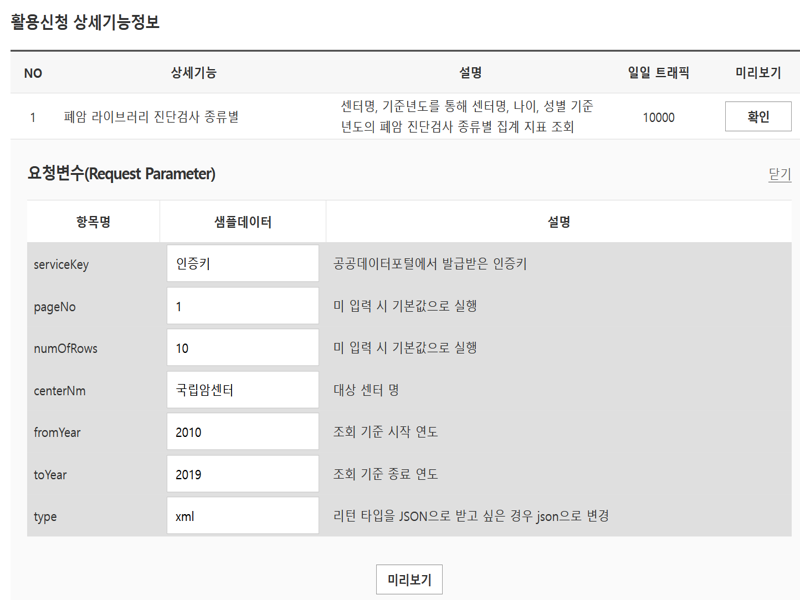

In [150]:
Image.open("C:/Users/whileduck/Desktop/진행과정.png").resize((800,600))

* 자동 승인이기 때문에 활용 신청만 하면 바로 XML 혹은 JSON 파일 형태로 받을 수 있다 

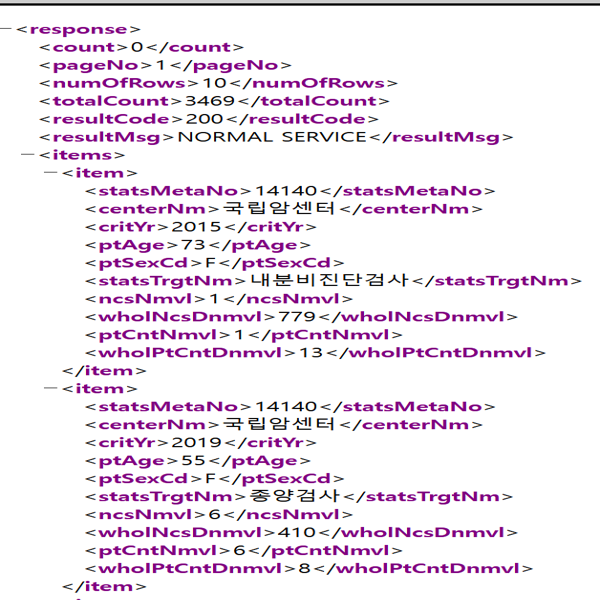

In [151]:
Image.open("C:/Users/whileduck/Desktop/XML 파일.png").resize((600,600))

* 신청하고 미리보기를 누르면 해당 값들을 가진 JSON 파일이 담긴 URL 주소를 받을 수 있다.

In [152]:
url = 'https://apis.data.go.kr/B551172/Lung14/dtlExamByType?serviceKey=Jwxgv8BQexpONepfrXnbs1PdxJ35yKLwEEW0bTK4QpCwdpecz%2F5tqkdCYp5rjomx8BzXWmSJLwvpuYYk1msbmw%3D%3D&pageNo=1&numOfRows=10&centerNm=%EA%B5%AD%EB%A6%BD%EC%95%94%EC%84%BC%ED%84%B0&fromYear=2010&toYear=2019&type=JSON'

* 담긴 주소를 URL 이란 변수에 담아주고 requests 를 보낸 후 필요한 내용을 데이터 프레임 형태로 만들면 될 것이다.

In [153]:
response = requests.get(url)
response  # Resonse 확인 

<Response [200]>

In [154]:
content = response.text
content # 이후 담긴 text 값들을 가져온다.

'<?xml version="1.0" encoding="utf-8" standalone="yes"?><response><count>0</count><pageNo>1</pageNo><numOfRows>10</numOfRows><totalCount>3469</totalCount><resultCode>200</resultCode><resultMsg>NORMAL SERVICE</resultMsg><items><item><statsMetaNo>14140</statsMetaNo><centerNm>국립암센터</centerNm><critYr>2015</critYr><ptAge>73</ptAge><ptSexCd>F</ptSexCd><statsTrgtNm>내분비진단검사</statsTrgtNm><ncsNmvl>1</ncsNmvl><wholNcsDnmvl>779</wholNcsDnmvl><ptCntNmvl>1</ptCntNmvl><wholPtCntDnmvl>13</wholPtCntDnmvl></item><item><statsMetaNo>14140</statsMetaNo><centerNm>국립암센터</centerNm><critYr>2019</critYr><ptAge>55</ptAge><ptSexCd>F</ptSexCd><statsTrgtNm>종양검사</statsTrgtNm><ncsNmvl>6</ncsNmvl><wholNcsDnmvl>410</wholNcsDnmvl><ptCntNmvl>6</ptCntNmvl><wholPtCntDnmvl>8</wholPtCntDnmvl></item><item><statsMetaNo>14140</statsMetaNo><centerNm>국립암센터</centerNm><critYr>2017</critYr><ptAge>45</ptAge><ptSexCd>M</ptSexCd><statsTrgtNm>일반진단검사</statsTrgtNm><ncsNmvl>128</ncsNmvl><wholNcsDnmvl>227</wholNcsDnmvl><ptCntNmvl>4</ptCntNm

* Beautiful Soup 을 이용해서 이쁘게 정렬 해준 후 Json 파일에서 해당 데이터들이 item 안에 감싸져있는 것을 볼 수 있다.

In [155]:
bs_content = bs(content, 'lxml-xml').find_all('item')
bs_content #각 행에서 name 과 text 를 추출하자 

[<item><statsMetaNo>14140</statsMetaNo><centerNm>국립암센터</centerNm><critYr>2015</critYr><ptAge>73</ptAge><ptSexCd>F</ptSexCd><statsTrgtNm>내분비진단검사</statsTrgtNm><ncsNmvl>1</ncsNmvl><wholNcsDnmvl>779</wholNcsDnmvl><ptCntNmvl>1</ptCntNmvl><wholPtCntDnmvl>13</wholPtCntDnmvl></item>,
 <item><statsMetaNo>14140</statsMetaNo><centerNm>국립암센터</centerNm><critYr>2019</critYr><ptAge>55</ptAge><ptSexCd>F</ptSexCd><statsTrgtNm>종양검사</statsTrgtNm><ncsNmvl>6</ncsNmvl><wholNcsDnmvl>410</wholNcsDnmvl><ptCntNmvl>6</ptCntNmvl><wholPtCntDnmvl>8</wholPtCntDnmvl></item>,
 <item><statsMetaNo>14140</statsMetaNo><centerNm>국립암센터</centerNm><critYr>2017</critYr><ptAge>45</ptAge><ptSexCd>M</ptSexCd><statsTrgtNm>일반진단검사</statsTrgtNm><ncsNmvl>128</ncsNmvl><wholNcsDnmvl>227</wholNcsDnmvl><ptCntNmvl>4</ptCntNmvl><wholPtCntDnmvl>4</wholPtCntDnmvl></item>,
 <item><statsMetaNo>14140</statsMetaNo><centerNm>국립암센터</centerNm><critYr>2014</critYr><ptAge>55</ptAge><ptSexCd>M</ptSexCd><statsTrgtNm>일반진단검사</statsTrgtNm><ncsNmvl>487</ncs

* 작동 원리를 볼 수 있도록 첫 번째 행의 값만 가지고 와서 시험해보자 

In [156]:
text = bs_content[0].find_all() # 현재 있는 text 데이터들을 모두 불러오고 
text

[<statsMetaNo>14140</statsMetaNo>,
 <centerNm>국립암센터</centerNm>,
 <critYr>2015</critYr>,
 <ptAge>73</ptAge>,
 <ptSexCd>F</ptSexCd>,
 <statsTrgtNm>내분비진단검사</statsTrgtNm>,
 <ncsNmvl>1</ncsNmvl>,
 <wholNcsDnmvl>779</wholNcsDnmvl>,
 <ptCntNmvl>1</ptCntNmvl>,
 <wholPtCntDnmvl>13</wholPtCntDnmvl>]

In [157]:
for i in range(len(text)):
    print('첫 번째 Text 의 열 이름은',text[i].name)
    print('첫 번째 Text 의 행 값은', text[i].text)

첫 번째 Text 의 열 이름은 statsMetaNo
첫 번째 Text 의 행 값은 14140
첫 번째 Text 의 열 이름은 centerNm
첫 번째 Text 의 행 값은 국립암센터
첫 번째 Text 의 열 이름은 critYr
첫 번째 Text 의 행 값은 2015
첫 번째 Text 의 열 이름은 ptAge
첫 번째 Text 의 행 값은 73
첫 번째 Text 의 열 이름은 ptSexCd
첫 번째 Text 의 행 값은 F
첫 번째 Text 의 열 이름은 statsTrgtNm
첫 번째 Text 의 행 값은 내분비진단검사
첫 번째 Text 의 열 이름은 ncsNmvl
첫 번째 Text 의 행 값은 1
첫 번째 Text 의 열 이름은 wholNcsDnmvl
첫 번째 Text 의 행 값은 779
첫 번째 Text 의 열 이름은 ptCntNmvl
첫 번째 Text 의 행 값은 1
첫 번째 Text 의 열 이름은 wholPtCntDnmvl
첫 번째 Text 의 행 값은 13


* 잘 확인했다 그렇다면 첫 번째 행 뿐이 아니라 모든 Item value 들에 대해서 추출해보자 

In [158]:
row_list = []
col_list = []
value_list = []

for num,content in enumerate(bs_content): # Requests 로 받은 item의 value 값들
    
    text = content.find_all() # value 값들을 순차적으로 text 변수에 저장
    
    for j in range(len(text)): # text 의 value 갯수만큼 반복 
        
        if num == 0: # 열 이름은 하나만 있어도 충분하기 때문에 첫 번째 item 의 name 들만 저장 
            
            col_list.append(text[j].name) 
        
        value_list.append(text[j].text) # 각 value 의 text 값들을 value_list 에 저장 
        
    row_list.append(value_list) # 담긴 value 값들을 row_list 에 저장
                                # 반복문이 돌아가는 동안 col_list 와 value_list 에는 하나의 행에 포함 될 데이터들이 축적
    value_list = []

In [159]:
result = pd.DataFrame(row_list, columns = col_list)
result

,statsMetaNo,centerNm,critYr,ptAge,ptSexCd,statsTrgtNm,ncsNmvl,wholNcsDnmvl,ptCntNmvl,wholPtCntDnmvl
0,14140,국립암센터,2015,73,F,내분비진단검사,1,779,1,13
1,14140,국립암센터,2019,55,F,종양검사,6,410,6,8
2,14140,국립암센터,2017,45,M,일반진단검사,128,227,4,4
3,14140,국립암센터,2014,55,M,일반진단검사,487,922,13,13
4,14140,국립암센터,2018,54,M,일반화학검사,273,649,14,14
5,14140,국립암센터,2019,75,M,일반화학검사,512,1170,22,22
6,14140,국립암센터,2010,48,F,일반화학검사,197,436,7,7
7,14140,국립암센터,2019,61,M,종양검사,14,1566,11,26
8,14140,국립암센터,2014,47,F,종양검사,5,344,4,6
9,14140,국립암센터,2015,35,F,일반진단검사,21,36,1,1
